# Customer Segmentation Project

## Task 1 :
### - Data Wrangling (preprocessing and cleaning).
 
## Task 2 :
### - Show the the sales and revenue of each year, month and day.
### - Show the total sales and revenue.

## Task 3 :
### - What is the top 10 countries that have most sales ?
### - What is the top 10 countries  that have most revenue ?
  
## Task 4 :
### - Show the sales for each product(stock code).
### - What is the high sales products that have more than twenty thousand  ?

## Task 5:
### - RFM Analysis.


In [1]:
#import Modules
 
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
def wrangle(path) :
    df = pd.read_csv(path,encoding = 'latin-1')
    # drop unused columns
    df = df.drop(columns = ['Description'])
    # drop duplicated rows
    df = df.drop_duplicates()
    # Convert the InvoiceDate column to datetime format
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    # Remove the rows with negative Quantity or UnitPrice
    df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
    # Remove the rows with negative Quantity or UnitPrice
    df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
    # Convert type of CustomerID to object
    df['CustomerID'] = df['CustomerID'].astype('object')
    # # Create a new column for Revenue = Quantity * UnitPrice
    df['Total_Price'] = df['Quantity'] * df['UnitPrice']
    # convert InvoiceDate into year, month and day 
    df['Year'] = df['InvoiceDate'].dt.year.astype('object')
    df['Day'] = df['InvoiceDate'].dt.day.astype('object')
    df['Month'] = df['InvoiceDate'].dt.month.astype('object')
    
    return df
    

In [3]:
path = 'D:\Data Tools\Data Tools Final Project\Online Retail\OnlineRetail.csv'
df = wrangle(path)

In [4]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Year,Day,Month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,1,12
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,1,12
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,1,12
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,1,12
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,1,12


In [5]:
df.tail()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Year,Day,Month
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,9,12
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,9,12
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,9,12
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,9,12
541908,581587,22138,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011,9,12


In [6]:
df.dtypes

InvoiceNo              object
StockCode              object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Total_Price           float64
Year                   object
Day                    object
Month                  object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524876 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524876 non-null  object        
 1   StockCode    524876 non-null  object        
 2   Quantity     524876 non-null  int64         
 3   InvoiceDate  524876 non-null  datetime64[ns]
 4   UnitPrice    524876 non-null  float64       
 5   CustomerID   392690 non-null  object        
 6   Country      524876 non-null  object        
 7   Total_Price  524876 non-null  float64       
 8   Year         524876 non-null  object        
 9   Day          524876 non-null  object        
 10  Month        524876 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 48.1+ MB


In [8]:
## note there are 0.25 missing customer and we will drop it on RFM task 
## but others tasks we can ignore it now 
df.isnull().sum() / len(df)

InvoiceNo      0.000000
StockCode      0.000000
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.251842
Country        0.000000
Total_Price    0.000000
Year           0.000000
Day            0.000000
Month          0.000000
dtype: float64

In [9]:
df.describe(include = 'object')

,InvoiceNo,StockCode,CustomerID,Country,Year,Day,Month
count,524876,524876,392690.0,524876,524876,524876,524876
unique,19960,3922,4338.0,38,2,31,12
top,573585,85123A,17841.0,United Kingdom,2011,8,11
freq,1114,2253,7676.0,479983,483885,23898,82003


In [10]:
df.describe()

,Quantity,UnitPrice,Total_Price
count,524876.000000,524876.000000,524876.000000
mean,10.616064,3.922575,20.274425
std,156.279818,36.093096,271.693148
min,1.000000,0.001000,0.001000
25%,1.000000,1.250000,3.900000
50%,4.000000,2.080000,9.920000
75%,11.000000,4.130000,17.700000
max,80995.000000,13541.330000,168469.600000


In [11]:
Total_sales_revenue = pd.DataFrame({'Sales':[df['Quantity'].sum()],'Total_Price':[df['Total_Price'].sum()]})
Total_sales_revenue

,Sales,Total_Price
0,5572117,1.064156e+07


In [12]:
# Show the sales and revenue of each year
sales_by_year = df.groupby("Year")["Quantity"].sum()
revenue_by_year = df.groupby("Year")["Total_Price"].sum()
print('Sales by',sales_by_year,'\n')
print('Revenue by',revenue_by_year)

Sales by Year
2010     358019
2011    5214098
Name: Quantity, dtype: int64 

Revenue by Year
2010     821452.730
2011    9820106.224
Name: Total_Price, dtype: float64


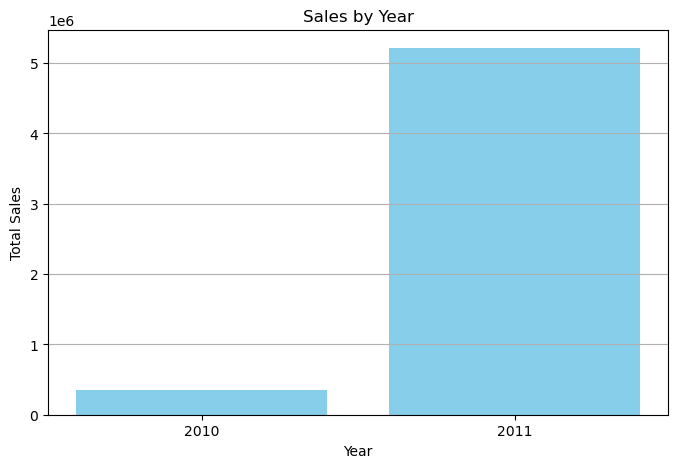

In [13]:
plt.figure(figsize=(8, 5))
plt.bar(sales_by_year.index, sales_by_year.values, color='skyblue')
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(sales_by_year.index)  # Set x-axis ticks to match the years
plt.grid(axis='y')
plt.show()

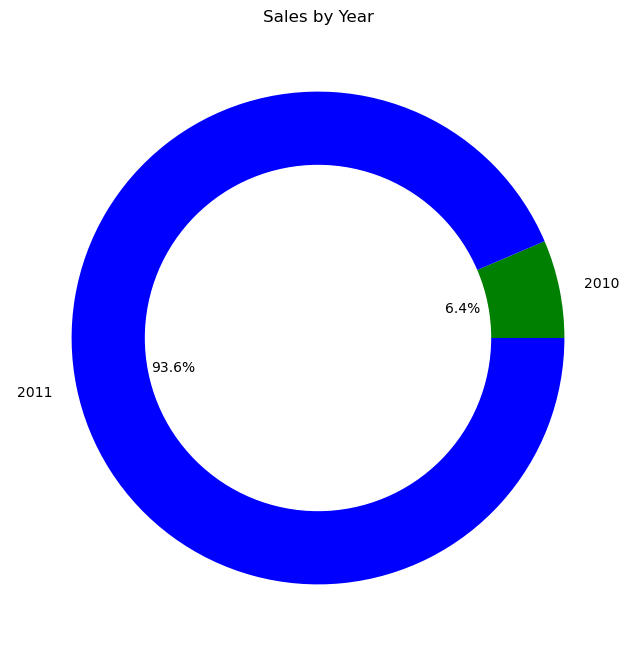

In [14]:
year=["2010","2011"] 
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.figure(figsize = (10,8))
plt.title('Sales by Year')
plt.pie(sales_by_year, labels=year, autopct='%1.1f%%',
        colors=['green','blue'])
p = plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()

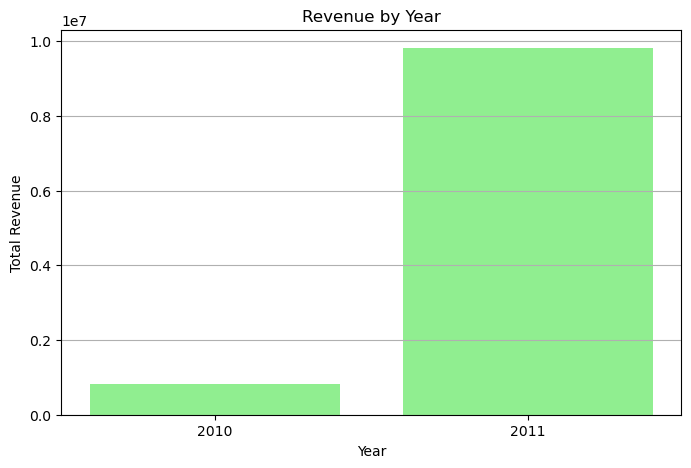

In [15]:
# Plotting revenue by year
plt.figure(figsize=(8, 5))
plt.bar(revenue_by_year.index, revenue_by_year.values, color='lightgreen')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(revenue_by_year.index)  # Set x-axis ticks to match the years
plt.grid(axis='y')
plt.show()

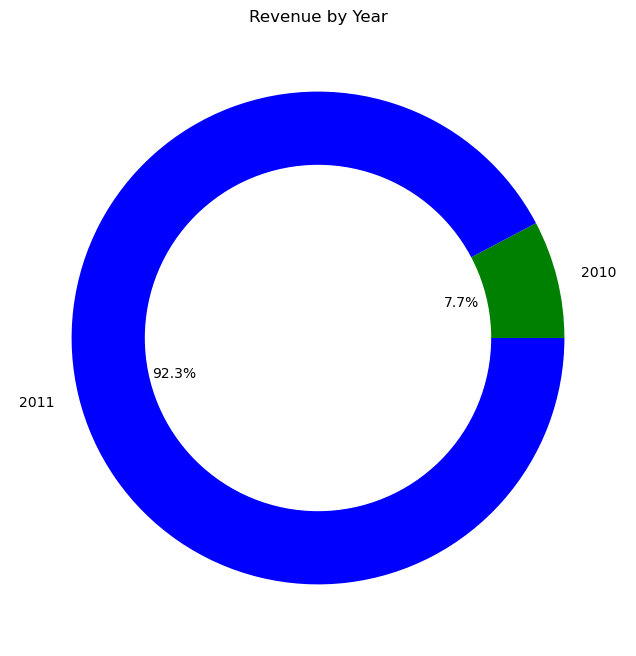

In [16]:
year=["2010","2011"] 
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.figure(figsize = (10,8))
plt.title('Revenue by Year')
plt.pie(revenue_by_year, labels=year, autopct='%1.1f%%',
        colors=['green','blue'])
p = plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()

In [17]:
# Show the sales and revenue of each month
sales_by_month = df.groupby("Month")["Quantity"].sum()
revenue_by_month = df.groupby("Month")["Total_Price"].sum()

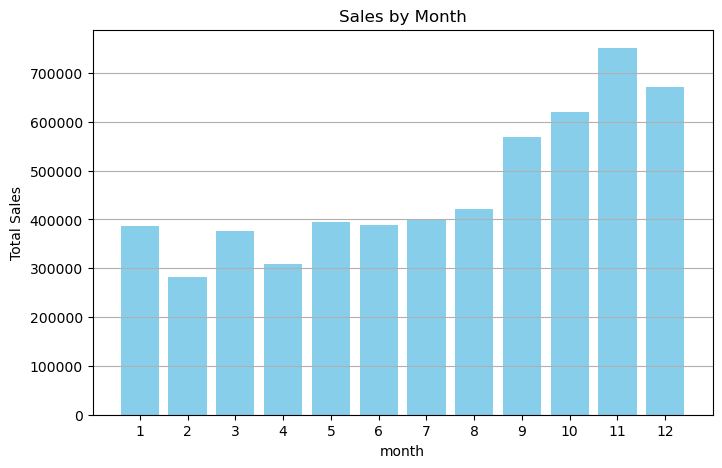

In [18]:
# Plotting sales by month

plt.figure(figsize=(8, 5))
plt.bar(sales_by_month.index, sales_by_month.values, color='skyblue')
plt.title('Sales by Month')
plt.xlabel('month')
plt.ylabel('Total Sales')
plt.xticks(sales_by_month.index)  # Set x-axis ticks to match the months
plt.grid(axis='y')
plt.show()

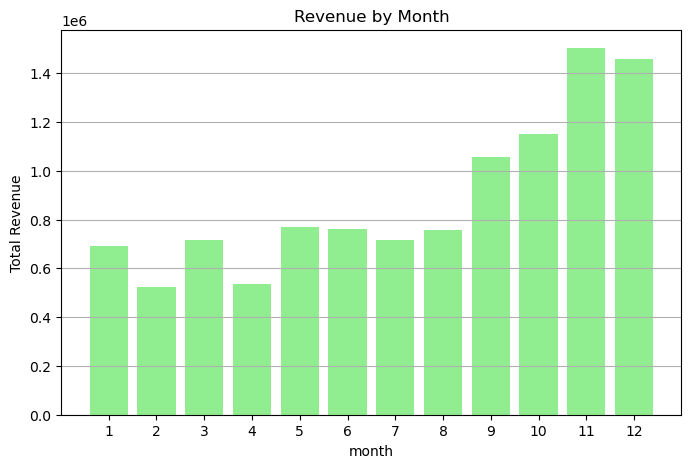

In [19]:
# Plotting revenue by month
plt.figure(figsize=(8, 5))
plt.bar(revenue_by_month.index, revenue_by_month.values, color='lightgreen')
plt.title('Revenue by Month')
plt.xlabel('month')
plt.ylabel('Total Revenue')
plt.xticks(revenue_by_month.index)  # Set x-axis ticks to match the months
plt.grid(axis='y')
plt.show()

In [20]:
# Show the sales and revenue of each day
sales_by_day = df.groupby("Day")["Quantity"].sum()
revenue_by_day = df.groupby("Day")["Total_Price"].sum()
#print('Sales by',sales_by_day,'\n')
#print('Revenue by',revenue_by_day)

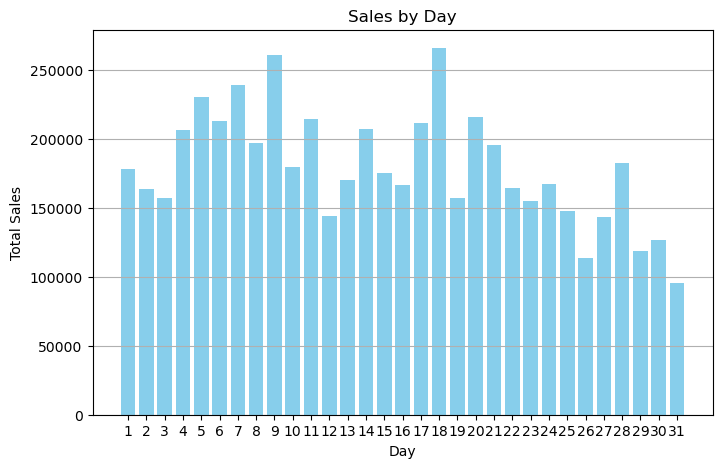

In [21]:
# Plotting sales by day

plt.figure(figsize=(8, 5))
plt.bar(sales_by_day.index, sales_by_day.values, color='skyblue')
plt.title('Sales by Day')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(sales_by_day.index)  # Set x-axis ticks to match the days
plt.grid(axis='y')
plt.show()

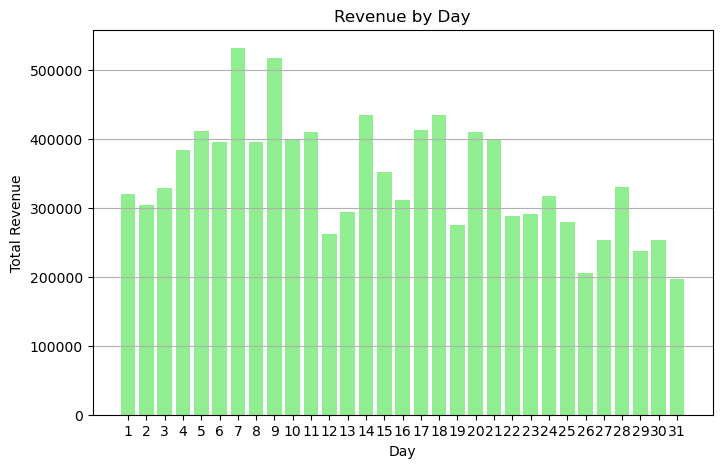

In [22]:
# Plotting revenue by day

plt.figure(figsize=(8, 5))
plt.bar(revenue_by_day.index, revenue_by_day.values, color='lightgreen')
plt.title('Revenue by Day')
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.xticks(revenue_by_day.index)  # Set x-axis ticks to match the days
plt.grid(axis='y')
plt.show()

In [23]:
country_stats = df.groupby('Country').agg({'Quantity': 'sum', 'Total_Price': 'sum'})
country_stats = country_stats.sort_values(by=['Quantity', 'Total_Price'], ascending=False)

In [24]:
top_10_sales = country_stats['Quantity'].head(10)
top_10_revenue = country_stats['Total_Price'].head(10)

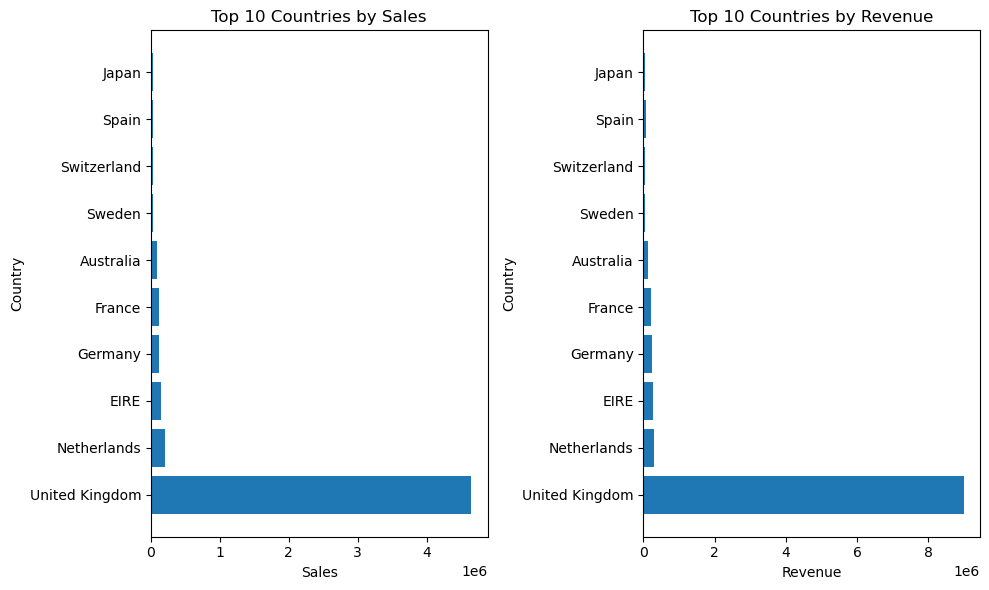

In [25]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.barh(top_10_sales.index, top_10_sales.values)
plt.title('Top 10 Countries by Sales')
plt.xlabel('Sales')
plt.ylabel('Country')
plt.subplot(1, 2, 2)
plt.barh(top_10_revenue.index, top_10_revenue.values)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [26]:
# Group the data by StockCode and aggregate the Quantity column
product_stats = df.groupby('StockCode')['Quantity'].sum()
# Sort the product_stats by Quantity in descending order
product_stats = product_stats.sort_values(ascending=False)

# Show the sales for each product
print(product_stats[:20])

StockCode
23843     80995
23166     78033
22197     56898
84077     54951
85099B    48371
85123A    37641
21212     36396
84879     36362
23084     30739
22492     26633
22616     26119
21977     24820
22178     24275
15036     23826
17003     23020
21915     21903
22386     21448
23203     20185
20725     19432
22086     19329
Name: Quantity, dtype: int64


In [27]:
product_stats.describe()

count     3922.000000
mean      1420.733554
std       3579.429384
min          1.000000
25%         54.000000
50%        369.500000
75%       1393.750000
max      80995.000000
Name: Quantity, dtype: float64

In [28]:
high_sales_products = product_stats[ product_stats >= 20000]
high_sales_products 

StockCode
23843     80995
23166     78033
22197     56898
84077     54951
85099B    48371
85123A    37641
21212     36396
84879     36362
23084     30739
22492     26633
22616     26119
21977     24820
22178     24275
15036     23826
17003     23020
21915     21903
22386     21448
23203     20185
Name: Quantity, dtype: int64

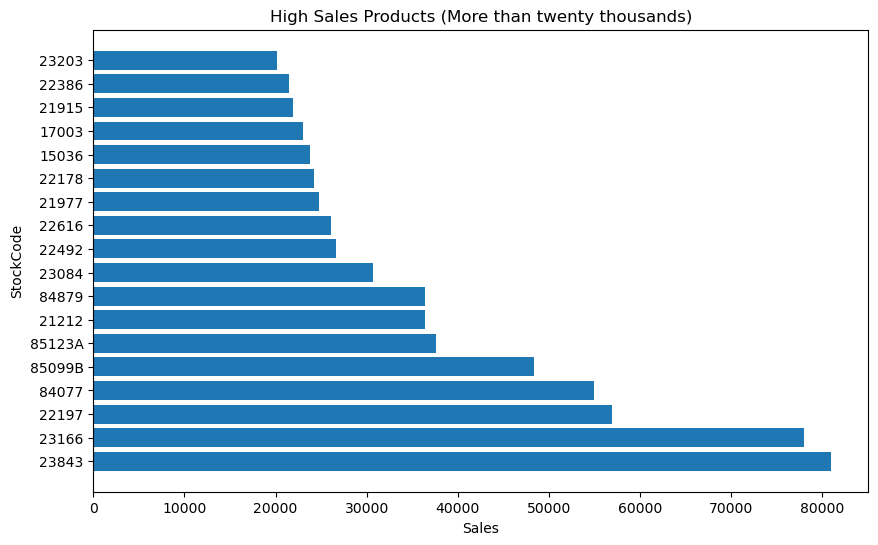

In [29]:
plt.figure(figsize=(10, 6))
plt.barh(high_sales_products.index, high_sales_products.values)
plt.title('High Sales Products (More than twenty thousands)')
plt.xlabel('Sales')
plt.ylabel('StockCode')
plt.show()

In [30]:
###############################################################

# RFM Analysis
## Here, you are going to perform following opertaions:
### - For Recency, Calculate the number of days between present date and date of last purchase each customer.
### - For Frequency, Calculate the number of orders for each customer.
### - For Monetary, Calculate sum of purchase price for each customer.

In [31]:
############################## RFM Analysis

In [32]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392690 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392690 non-null  object        
 1   StockCode    392690 non-null  object        
 2   Quantity     392690 non-null  int64         
 3   InvoiceDate  392690 non-null  datetime64[ns]
 4   UnitPrice    392690 non-null  float64       
 5   CustomerID   392690 non-null  object        
 6   Country      392690 non-null  object        
 7   Total_Price  392690 non-null  float64       
 8   Year         392690 non-null  object        
 9   Day          392690 non-null  object        
 10  Month        392690 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 36.0+ MB


In [33]:
now = dt.datetime(2011,12,10)
now

datetime.datetime(2011, 12, 10, 0, 0)

In [34]:
print(df['InvoiceDate'].min(), df['InvoiceDate'].max())

2010-12-01 08:26:00 2011-12-09 12:50:00


In [35]:
RFM = df.groupby('CustomerID').agg({'InvoiceDate' : lambda day : (now - day.max()).days,
 'InvoiceNo': lambda num : len(num),
 'Total_Price': lambda price : price.sum()})

RFM

,InvoiceDate,InvoiceNo,Total_Price
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [36]:
cols_name = ['Recency', 'Frequency', 'Monetary']
RFM.columns = cols_name
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [37]:
#Discretize variable into equal-sized buckets based on rank or based on sample quantiles

RFM["R"] = pd.qcut(RFM["Recency"],5,labels=[5,4,3,2,1])
RFM["F"] = pd.qcut(RFM["Frequency"],5,labels=[1,2,3,4,5])
RFM["M"] = pd.qcut(RFM["Monetary"],5,labels=[1,2,3,4,5])


In [38]:
RFM

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,5
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,18,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2
...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1
18281.0,180,7,80.82,1,1,1
18282.0,7,12,178.05,5,1,1


In [39]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    4338 non-null   int64   
 1   Frequency  4338 non-null   int64   
 2   Monetary   4338 non-null   float64 
 3   R          4338 non-null   category
 4   F          4338 non-null   category
 5   M          4338 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 148.9 KB


In [40]:
# Calculating RFM Scores
RFM["RFM_Score"] = RFM["R"].astype(str) +RFM["F"].astype(str) + RFM["M"].astype(str)
RFM

,Recency,Frequency,Monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,115
12347.0,2,182,4310.00,5,5,5,555
12348.0,75,31,1797.24,2,3,4,234
12349.0,18,73,1757.55,4,4,4,444
12350.0,310,17,334.40,1,2,2,122
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,111
18281.0,180,7,80.82,1,1,1,111
18282.0,7,12,178.05,5,1,1,511


In [41]:
#Segmenting Customers Using rfm_score
seg_map = {
 r'[1-2][1-2]': 'Hibernating',
 r'[1-2][3-4]': 'At Risk',
 r'[1-2]5': 'Can\'t Loose',
 r'3[1-2]': 'About to Sleep',
 r'33': 'Need Attention',
 r'[3-4][4-5]': 'Loyal Customers',
 r'41': 'Promising',
 r'51': 'New Customers',
 r'[4-5][2-3]': 'Potential Loyalists',
 r'5[4-5]': 'Champions'
}

In [42]:
RFM['Segment'] = RFM['R'].astype(str) + RFM['F'].astype(str)
RFM['Segment'] = RFM['Segment'].replace(seg_map, regex=True)
RFM.head()


,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,5,115,Hibernating
12347.0,2,182,4310.00,5,5,5,555,Champions
12348.0,75,31,1797.24,2,3,4,234,At Risk
12349.0,18,73,1757.55,4,4,4,444,Loyal Customers
12350.0,310,17,334.40,1,2,2,122,Hibernating


In [43]:
# average values of each segment
RFM.groupby('Segment').mean().sort_values('Monetary')

,Recency,Frequency,Monetary
Segment,,,
Promising,22.437500,7.758929,429.433929
About to Sleep,52.176471,15.962848,449.729381
Hibernating,209.711111,13.644444,534.678317
Need Attention,52.044118,41.274510,836.859461
Potential Loyalists,15.629555,34.740891,908.291783
At Risk,163.743816,56.779152,1002.180636
Can't Loose,144.851852,179.592593,2399.085321
Loyal Customers,33.198286,154.976744,2839.947050
New Customers,6.421053,7.578947,3618.697018


In [44]:
RFM['Segment'].value_counts()

Hibernating            1080
Loyal Customers         817
Champions               604
At Risk                 566
Potential Loyalists     494
About to Sleep          323
Need Attention          204
Promising               112
Can't Loose              81
New Customers            57
Name: Segment, dtype: int64

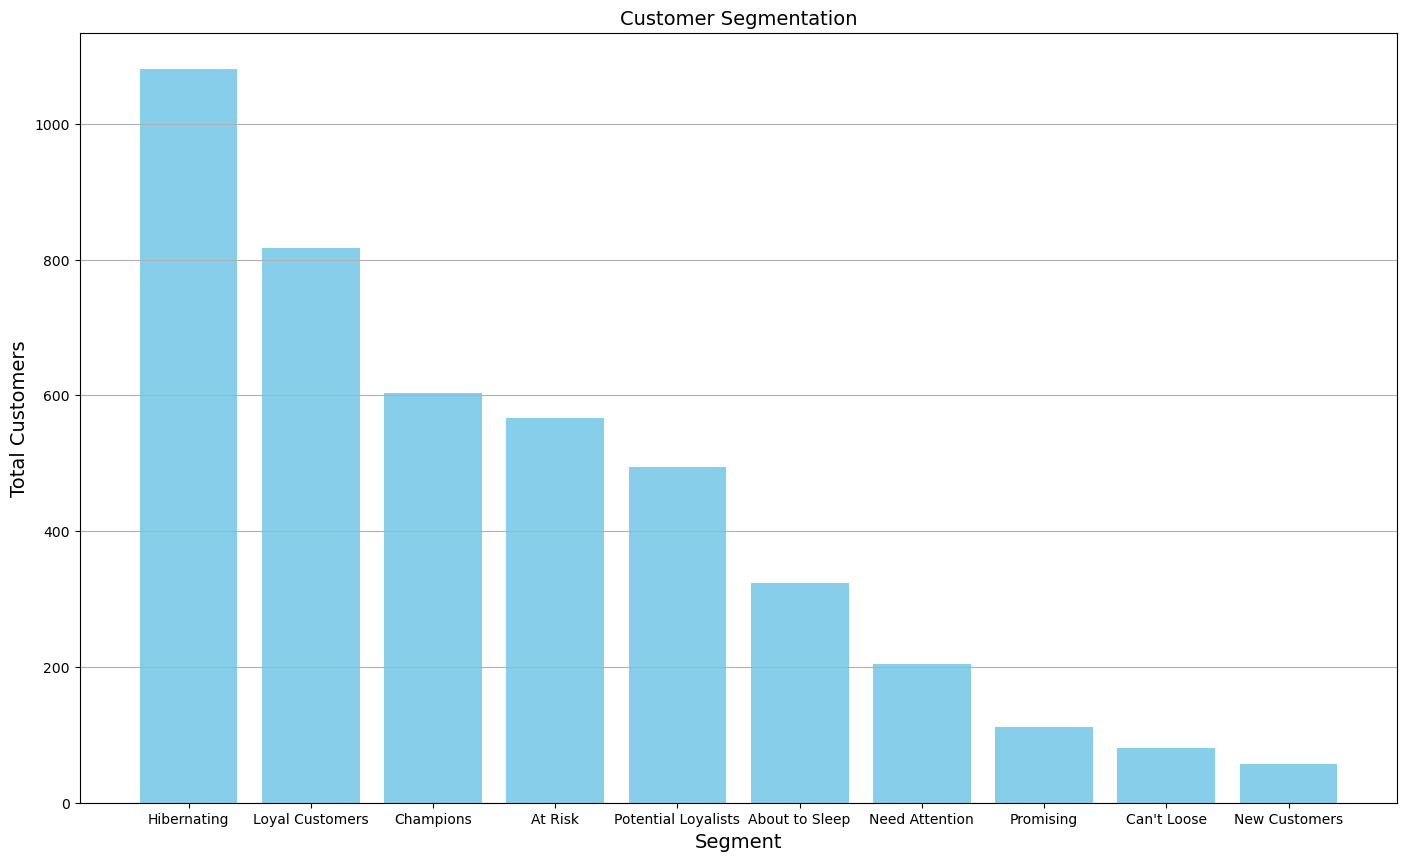

In [45]:
plt.figure(figsize=(17, 10))
plt.bar( RFM['Segment'].value_counts().index , RFM['Segment'].value_counts().values , color='skyblue')
plt.title('Customer Segmentation',fontsize = 14)
plt.xlabel('Segment',fontsize = 14)
plt.ylabel('Total Customers',fontsize = 14)
plt.xticks(RFM['Segment'].value_counts().index)   
plt.grid(axis='y')
plt.show()

In [46]:
###########################################################################################################################